# Topic Modeling with LDA and Gensim: Analyzing 200k News Articles from Various Publishers

Fall 2022 | 2022-11-30

In [1]:
import nltk
from nltk.corpus import stopwords
from nltk import word_tokenize
from nltk.corpus import PlaintextCorpusReader
from nltk.corpus import AlignedCorpusReader
from nltk.tokenize import word_tokenize
from nltk.corpus import wordnet as wn
from nltk.stem.wordnet import WordNetLemmatizer

In [2]:
import string
import re
import numpy
import spacy
import pickle

In [37]:
import gensim
from gensim.models import ldamodel
from gensim.corpora import Dictionary
from gensim import corpora
from gensim.parsing.preprocessing import remove_stopwords
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
pyLDAvis.enable_notebook()

In [5]:
import matplotlib.pyplot as plt
import pandas as pd
import math

In [39]:
import warnings
warnings.filterwarnings('ignore')
warnings.simplefilter('always')
warnings.filterwarnings("ignore", category=DeprecationWarning)

## Preprocessing functions

Saving the root of the words

In [7]:
def get_lemma(word):
    lemma = wn.morphy(word)
    if lemma is None:
        return word
    else:
        return lemma

prepare_text() removes the stopwords and only extracts lowercased stings which contains more than 4 characters and finally tokenize the text

In [8]:
def prepare_text(text):
    out = remove_stopwords(re.sub(r'[^\w\s]|[0-9]', ' ', text)).lower()
    out = word_tokenize(out)
    out = [i for i in out if len(i) > 4]
    out = [get_lemma(i) for i in out]
    
    return out

## Data files

In [9]:
Corpus_root = '/Users/salehbabaei/Desktop/2022/Sem 5/BDM 550/Final Project/corpus'
Corpus = PlaintextCorpusReader(Corpus_root, '.*csv')
corpus_raw = Corpus.raw()
corpus_raw = [p for p in corpus_raw.split('\n') if p]
corpus_raw = corpus_raw[1:]

In [10]:
len(corpus_raw)

183220

## Processing

In [11]:
tokens = [prepare_text(i) for i in corpus_raw]

Convert to bag of words

In [12]:
dictionary = Dictionary(tokens)

corpus = [dictionary.doc2bow(text) for text in tokens]

Saving the dictionary corpus for pyLDAviz

In [13]:
pickle.dump(corpus, open('corpus.pkl', 'wb'))
dictionary.save('dictionary.gensim')

### Model

In [14]:
numpy.random.seed(1)
model = ldamodel.LdaModel(corpus, id2word=dictionary, num_topics=20, alpha='asymmetric', minimum_probability=1e-8)

## Topics

In [15]:
model.save('lda20.gensim')
topics = model.print_topics(num_words=4)
for topic in topics:
    print(topic)

(0, '0.016*"charge" + 0.015*"crime" + 0.015*"sentence" + 0.014*"prison"')
(1, '0.023*"state" + 0.015*"school" + 0.013*"federal" + 0.011*"student"')
(2, '0.020*"people" + 0.012*"american" + 0.010*"think" + 0.007*"white"')
(3, '0.007*"water" + 0.005*"years" + 0.005*"player" + 0.005*"season"')
(4, '0.023*"percent" + 0.012*"million" + 0.010*"billion" + 0.010*"market"')
(5, '0.023*"state" + 0.022*"islamic" + 0.020*"attack" + 0.015*"muslim"')
(6, '0.035*"company" + 0.009*"technology" + 0.009*"apple" + 0.009*"facebook"')
(7, '0.062*"trump" + 0.025*"president" + 0.023*"obama" + 0.015*"policy"')
(8, '0.063*"washington" + 0.062*"archive" + 0.056*"trump" + 0.049*"washingtonpost"')
(9, '0.035*"police" + 0.018*"officer" + 0.015*"people" + 0.011*"shooting"')
(10, '0.018*"european" + 0.016*"britain" + 0.016*"europe" + 0.014*"minister"')
(11, '0.065*"woman" + 0.026*"child" + 0.016*"family" + 0.011*"people"')
(12, '0.063*"israel" + 0.037*"israeli" + 0.031*"palestinian" + 0.027*"jewish"')
(13, '0.026*"m

In [16]:
all_topics = model.get_document_topics(corpus, per_word_topics=True)

#  PyLDAvis 

In [17]:
dictionary = Dictionary.load('dictionary.gensim')
corpus = pickle.load(open('corpus.pkl', 'rb'))
lda = gensim.models.ldamodel.LdaModel.load('lda20.gensim')

In [ ]:
lda_display = gensimvis.prepare(lda, corpus, dictionary, sort_topics=False)

In [42]:
pyLDAvis.display(lda_display)

##  Most Popular Topic

In [19]:
topT = model.top_topics(corpus=corpus, dictionary=dictionary, window_size=None, coherence='u_mass', topn=1, processes=-1)

In [20]:
topT

[([(0.016235536, 'charge')], nan),
 ([(0.02254132, 'state')], nan),
 ([(0.01957012, 'people')], nan),
 ([(0.0066995015, 'water')], nan),
 ([(0.022864588, 'percent')], nan),
 ([(0.023112662, 'state')], nan),
 ([(0.034588117, 'company')], nan),
 ([(0.06151019, 'trump')], nan),
 ([(0.062892176, 'washington')], nan),
 ([(0.03462301, 'police')], nan),
 ([(0.017870652, 'european')], nan),
 ([(0.065173306, 'woman')], nan),
 ([(0.062753975, 'israel')], nan),
 ([(0.026396617, 'military')], nan),
 ([(0.018590707, 'state')], nan),
 ([(0.048892822, 'trump')], nan),
 ([(0.060474407, 'court')], nan),
 ([(0.017669383, 'health')], nan),
 ([(0.055390913, 'trump')], nan),
 ([(0.0062397434, 'story')], nan)]

In [21]:
d = {}
for i in topT:
    if str(i[0][0][1]) not in d:
        d[str(i[0][0][1])] = round(i[0][0][0] *len(corpus))
    else:
        d[str(i[0][0][1])] += round(i[0][0][0]* len(corpus))
dict(sorted(d.items(), key=lambda item: item[1], reverse=True))

{'trump': 30377,
 'woman': 11941,
 'state': 11771,
 'washington': 11523,
 'israel': 11498,
 'court': 11080,
 'police': 6344,
 'company': 6337,
 'military': 4836,
 'percent': 4189,
 'people': 3586,
 'european': 3274,
 'health': 3237,
 'charge': 2975,
 'water': 1227,
 'story': 1143}

In [22]:
x = list(d.keys())[:4]
y = list(d.values())[:4]

In [23]:
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i, y[i]//2, y[i], ha = 'center')

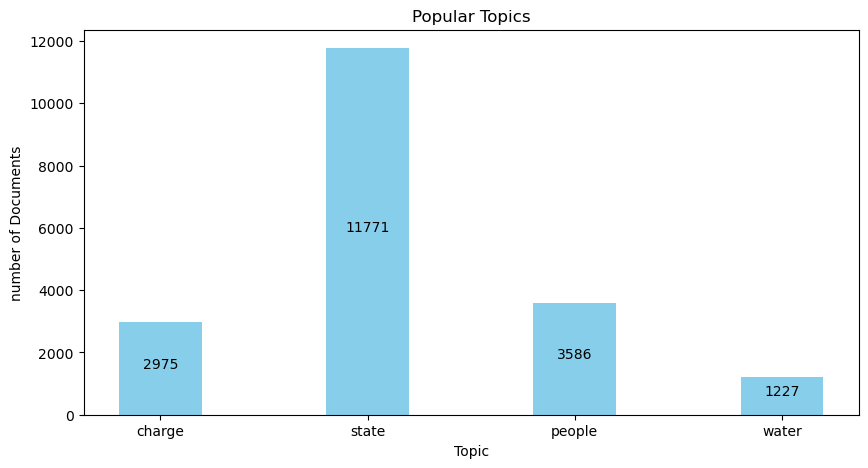

In [24]:
fig = plt.figure(figsize = (10, 5))
plt.bar(x, y, color ='skyblue',
        width = 0.4)
addlabels(x, y)
plt.title("Popular Topics")
plt.xlabel("Topic")
plt.ylabel("number of Documents")
plt.show()

## Popularity Trend

In [25]:
docTop = [list(list(zip(*model.get_document_topics(i)))[1]) for i in corpus]

In [26]:
dates = [re.findall("\d{4}[/-]\d{2}[/-]\d{2}",i) for i in corpus_raw]
dates = [i[0] if len(i)>0 else '' for i in dates ]

In [27]:
topics_df = pd.DataFrame(docTop)[[0,3,5,15]].rename(columns = {0:'Police',3:'Family', 5:'Business', 15:'Galaxy'})
topics_df['dates'] = dates
topics_df

,Police,Family,Business,Galaxy,dates
0,0.000319,0.000191,0.000150,0.259267,2016-12-31
1,0.233592,0.014547,0.000034,0.000017,2017-06-19
2,0.000149,0.067535,0.022946,0.000034,2017-01-06
3,0.010049,0.166579,0.009613,0.000037,2017-04-10
4,0.000409,0.000244,0.000193,0.000094,2017-01-02
...,...,...,...,...,...
183215,0.000254,0.000152,0.000120,0.009733,
183216,0.007792,0.495425,0.003678,0.001789,2016-12-30
183217,0.000474,0.169808,0.013999,0.008317,
183218,0.006564,0.003925,0.003097,0.233740,2016-12-29


In [28]:
topics_df['month'] = pd.to_datetime(topics_df['dates']).dt.strftime('%Y-%m')

In [29]:
topics_df = topics_df[(topics_df['month'] > '2016-01-01') & (topics_df['month'] < '2018-01-01')]

In [30]:
topics_df

,Police,Family,Business,Galaxy,dates,month
0,0.000319,0.000191,0.000150,0.259267,2016-12-31,2016-12
1,0.233592,0.014547,0.000034,0.000017,2017-06-19,2017-06
2,0.000149,0.067535,0.022946,0.000034,2017-01-06,2017-01
3,0.010049,0.166579,0.009613,0.000037,2017-04-10,2017-04
4,0.000409,0.000244,0.000193,0.000094,2017-01-02,2017-01
...,...,...,...,...,...,...
183210,0.132980,0.004401,0.130297,0.001689,2016-12-30,2016-12
183212,0.006933,0.325027,0.383973,0.001590,2016-12-30,2016-12
183214,0.004623,0.002765,0.002181,0.001061,2016-12-30,2016-12
183216,0.007792,0.495425,0.003678,0.001789,2016-12-30,2016-12


In [31]:
topics_df = topics_df.groupby('month').sum()

In [32]:
topics_df

,Police,Family,Business,Galaxy
month,,,,
2016-02,210.483017,344.227417,144.862167,845.317261
2016-03,226.402176,355.717896,249.406158,776.877502
2016-04,265.054810,367.958710,168.711548,721.940369
2016-05,204.842300,409.020203,157.875122,604.270569
2016-06,247.989410,499.207916,315.722656,558.847229
2016-07,200.020706,495.761261,279.534912,734.252808
2016-08,279.832184,809.976074,266.191589,640.098755
2016-09,251.815048,582.581726,231.347122,651.232361
2016-10,252.929703,561.699158,184.158173,797.233887


Text(0, 0.5, 'Topic Evolution')

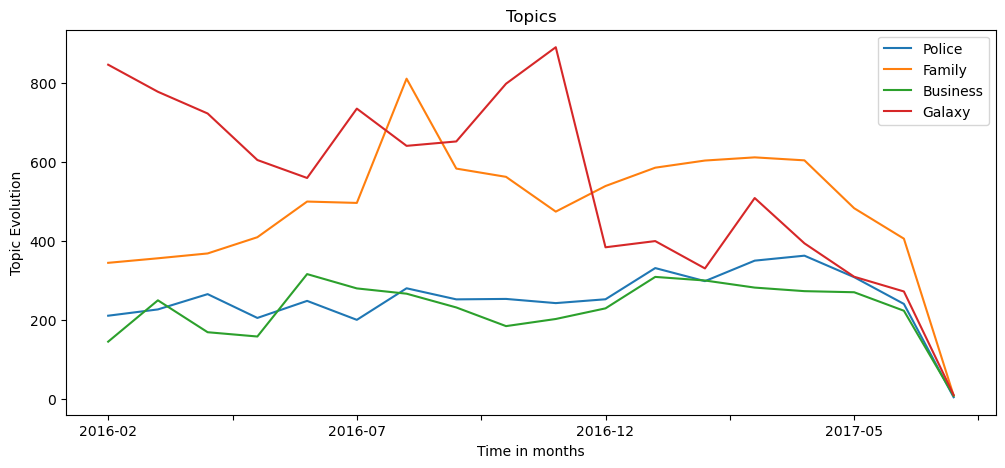

In [33]:
topics_df.plot(grid= False, figsize=(12, 5))
plt.title("Topics")
plt.xlabel("Time in months")
plt.ylabel("Topic Evolution")